In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('SBINdata.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2012-01-02,142.951379,143.565669,141.406913,142.832916,14464990,0.0,0.0
1,2012-01-03,144.267688,150.059462,144.179942,149.677734,21341020,0.0,0.0
2,2012-01-04,150.234975,150.401710,147.005632,148.835297,22241630,0.0,0.0
3,2012-01-05,148.830885,150.809730,147.431206,148.519348,21344840,0.0,0.0
4,2012-01-06,146.988056,149.848833,145.500618,146.790604,21137420,0.0,0.0


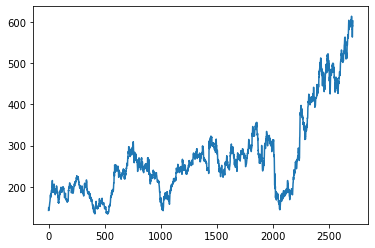

In [4]:
df['Close'].plot()

In [5]:
df['open-close'] = df['Open'] - df['Close']

In [6]:
df['open-close'].head()

0    0.118463
1   -5.410046
2    1.399679
3    0.311537
4    0.197452
Name: open-close, dtype: float64

In [7]:
df['low-high']  = df['Low'] - df['High']

In [8]:
df['low-high'].head()

0   -2.158756
1   -5.879520
2   -3.396078
3   -3.378523
4   -4.348215
Name: low-high, dtype: float64

In [9]:
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

In [10]:
df['target'].head()

0    1
1    0
2    0
3    0
4    0
Name: target, dtype: int32

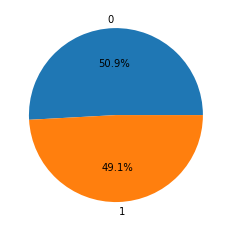

In [11]:

plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

In [12]:

splitted = df['Date'].str.split('-', expand=True)
 
df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')
 
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,open-close,low-high,target,day,month,year
0,2012-01-02,142.951379,143.565669,141.406913,142.832916,14464990,0.0,0.0,0.118463,-2.158756,1,1,2012,2
1,2012-01-03,144.267688,150.059462,144.179942,149.677734,21341020,0.0,0.0,-5.410046,-5.879520,0,1,2012,3
2,2012-01-04,150.234975,150.401710,147.005632,148.835297,22241630,0.0,0.0,1.399679,-3.396078,0,1,2012,4
3,2012-01-05,148.830885,150.809730,147.431206,148.519348,21344840,0.0,0.0,0.311537,-3.378523,0,1,2012,5
4,2012-01-06,146.988056,149.848833,145.500618,146.790604,21137420,0.0,0.0,0.197452,-4.348215,0,1,2012,6


In [13]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)

#features = df[['open-close', 'low-high', 'is_quarter_end']]
#target = df['target']

In [14]:
df['is_quarter_end']

0       0
1       0
2       0
3       0
4       0
       ..
2708    1
2709    1
2710    1
2711    1
2712    1
Name: is_quarter_end, Length: 2713, dtype: int32

In [15]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

In [16]:
scaler = StandardScaler()

In [17]:
features = scaler.fit_transform(features)

In [18]:
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.2, random_state=42)
print(X_train.shape, X_valid.shape)

(2170, 3) (543, 3)


In [19]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5111934905769453
Validation Accuracy :  0.452020202020202

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.48986409513510576
Validation Accuracy :  0.5045753231237102

[18:54:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, pred

In [21]:
training_set = df.iloc[:, 1:2].values

In [22]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [25]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,open-close,low-high,target,day,month,year,is_quarter_end
0,2012-01-02,142.951379,143.565669,141.406913,142.832916,14464990,0.0,0.0,0.118463,-2.158756,1,1,2012,2,0
1,2012-01-03,144.267688,150.059462,144.179942,149.677734,21341020,0.0,0.0,-5.410046,-5.879520,0,1,2012,3,0
2,2012-01-04,150.234975,150.401710,147.005632,148.835297,22241630,0.0,0.0,1.399679,-3.396078,0,1,2012,4,0
3,2012-01-05,148.830885,150.809730,147.431206,148.519348,21344840,0.0,0.0,0.311537,-3.378523,0,1,2012,5,0
4,2012-01-06,146.988056,149.848833,145.500618,146.790604,21137420,0.0,0.0,0.197452,-4.348215,0,1,2012,6,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2713 non-null   object 
 1   Open            2713 non-null   float64
 2   High            2713 non-null   float64
 3   Low             2713 non-null   float64
 4   Close           2713 non-null   float64
 5   Volume          2713 non-null   int64  
 6   Dividends       2713 non-null   float64
 7   Stock Splits    2713 non-null   float64
 8   open-close      2713 non-null   float64
 9   low-high        2713 non-null   float64
 10  target          2713 non-null   int32  
 11  day             2713 non-null   int32  
 12  month           2713 non-null   int32  
 13  year            2713 non-null   int32  
 14  is_quarter_end  2713 non-null   int32  
dtypes: float64(8), int32(5), int64(1), object(1)
memory usage: 265.1+ KB


In [27]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [28]:
numeric_features

['Open',
 'High',
 'Low',
 'Close',
 'Volume',
 'Dividends',
 'Stock Splits',
 'open-close',
 'low-high',
 'target',
 'day',
 'month',
 'year',
 'is_quarter_end']

In [29]:
categorical_features

['Date']